In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#取样函数
def sample(N):
    x = np.linspace(-math.pi,math.pi,N)
    y = []
    for i in x:
        noise = (np.random.rand()-0.5)*0.5
        y.append(math.sin(i)+noise)
    x = np.array(x)
    y = np.array(y)
    return x,y

#多项式函数
def H(W,X):
    H = np.dot(W.T,X)
    return H[0][0]

#产生参数W
#M代表次数
def param(M):
    W = np.ones((M+1,1))
    return W

#平方损失函数
def loss(x,y,W,M,N):
    loss = 0
    for i in range(N):
        X = np.ones((M+1,1))
        for j in range(M+1):
            X[j][0] = X[j][0]*(x[i]**j)
        loss = (H(W,X) - y[i])**2 + loss
    loss = loss/(2*N)
    return loss

#梯度
def grad(x,y,W,M,N):
    grad = np.ones((M+1,1))
    sum = 0
    for k in range(M+1):
        for i in range(N):
            X = np.ones((M+1,1))
            for j in range(M+1):
                X[j][0] = x[i]**j
            sum = sum + (H(W,X) - y[i])*x[i]**k
        grad[k][0] = sum/N
    return grad

#共轭梯度法
#A是取样点x形成的矩阵
#b是y
#x0是参数w形成的矩阵
def conGrad(A, b, x0):
    b = b.reshape((b.size,1))
    x = x0
    p = b - np.dot(A,x0)
    r = p
    
    for k in range(x0.size):
        if (r==np.zeros_like(r)).all():
            break
        alpha = ((np.dot(r.T,r))/np.dot(np.dot(A,p).T,p))[0][0]
        x = x + alpha*p
        temp = r
        r = r - alpha*np.dot(A,p)
        belta = np.dot(r.T,r)[0][0]/np.dot(temp.T,temp)[0][0]
        p = r+belta*p
    return x

In [3]:
#x,y是采样点的值，x1，y1是原正弦函数的图形
xs = []
ys = []

#N是取样点的个数
N = 10

x,y = sample(N)
xs = np.linspace(-math.pi,math.pi,10000)
for i in xs:
    ys.append(math.sin(i))

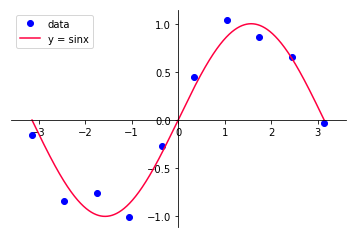

In [4]:
#画出原函数与取样情况
plt.figure()
plt.plot(x,y,"ob",label='data')
plt.plot(xs,ys,color="#ff0040",label='y = sinx')
plt.xlim((-3.6, 3.6))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.legend()
plt.show()

In [5]:
#M是多项式的次数
#a是学习率

a = 0.0001
M1 = 3
W1 = param(M1)
newLoss = loss(x,y,W1,M1,N)

In [6]:
epoch = 1000000
loss_x = []
loss_y = []
i = 1
while True:
    W1 = W1 - a*grad(x,y,W1,M1,N)
    oldLoss = newLoss
    newLoss = loss(x,y,W1,M1,N)
    loss_x.append(i+1)
    loss_y.append(newLoss)
    t = abs(newLoss-oldLoss)
#     print("第",i+1,"次迭代，平方损失函数为：",newLoss,"，与上次相差：",t)
#     print("各项参数为：\n",W1)
    if t<1e-9:
        print("break complete")
        break
    if newLoss > 1e+16:
        print("break too big")
        break
    i = i+1
print("第",i+1,"次迭代，平方损失函数为：",newLoss,"，与上次相差：",t)
print("各项参数为：\n",W1)

break complete
第 130061 次迭代，平方损失函数为： 0.012017320207967816 ，与上次相差： 9.999172306124349e-10
各项参数为：
 [[ 0.06988608]
 [ 0.81236418]
 [-0.01854155]
 [-0.08158213]]


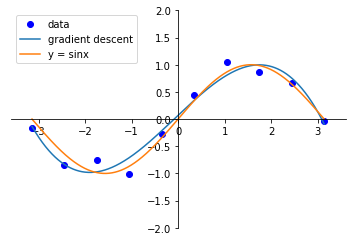

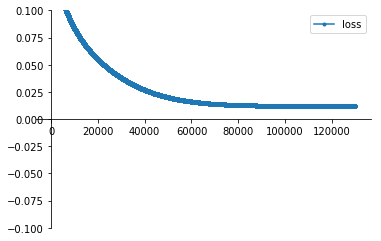

In [7]:
plt.figure()
x1 = np.array(np.linspace(-math.pi,math.pi,1000))
y1 = []


for i in range(1000):
    X1 = np.ones((M1+1,1))
    for j in range(M1+1):
          X1[j][0] = X1[j][0]*(x1[i]**j)
    y1.append(H(W1,X1))
y1 = np.array(y1)

# for i in range(1000):
#     yT.append(xL[i]+(xL[i]**3)/6.0+(xL[i]**5)/120)
# yT = np.array(yT)

plt.plot(x,y,"ob",label='data')
plt.plot(x1,y1,label='gradient descent')
# plt.plot(xL,yT,label='taile')
plt.plot(xs,ys,label='y = sinx')
plt.xlim((-3.6, 3.6))
plt.ylim((-2, 2))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.legend()
plt.show()

plt.plot(loss_x,loss_y,linestyle='-',marker='.',label='loss')
# plt.xlim(0.16*len(loss_x))
plt.ylim((-0.1,0.1))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.legend()
plt.show()

In [8]:
#不加正则项的解析解
M2 = 3
W2 = param(M2)

X = np.ones((N,M2+1))
for i in range(N):
    for j in range(M2+1):
        X[i][j] = X[i][j]*(x[i]**j)
        
temp1 = np.dot(X.T,X)
temp2 = np.linalg.inv(temp1)
temp3 = np.dot(temp2,X.T)
W2 = np.dot(temp3,y.reshape((N,1)))

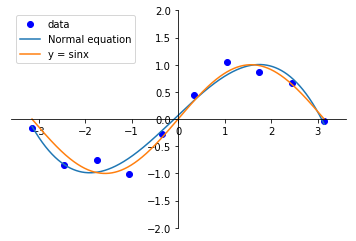

In [9]:
plt.figure()
x2 = np.array(np.linspace(-math.pi,math.pi,1000))
y2 = []

for i in range(1000):
    X2 = np.ones((M2+1,1))
    for j in range(M2+1):
          X2[j][0] = X2[j][0]*(x2[i]**j)
    y2.append(H(W2,X2))
y2 = np.array(y2)

plt.plot(x,y,"ob",label='data')
plt.plot(x2,y2,label='Normal equation')
# plt.plot(xL,yT,label='taile')
plt.plot(xs,ys,label='y = sinx')
plt.xlim((-3.6, 3.6))
plt.ylim((-2, 2))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.legend()
plt.show()

In [10]:
#加L2正则项的解析解
M3 = 3
W3 = param(M3)
I = np.eye(M3+1)
lam = 0.001
X = np.ones((N,M3+1))
for i in range(N):
    for j in range(M3+1):
        X[i][j] = X[i][j]*(x[i]**j)

temp1 = np.dot(X.T,X) + lam*N*I
temp2 = np.linalg.inv(temp1)
temp3 = np.dot(temp2,X.T)
W3 = np.dot(temp3,y.reshape((N,1)))

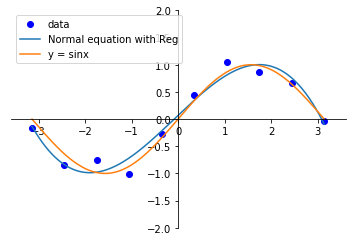

In [11]:
plt.figure()
x3 = np.array(np.linspace(-math.pi,math.pi,1000))
y3 = []

for i in range(1000):
    X3 = np.ones((M3+1,1))
    for j in range(M3+1):
          X3[j][0] = X3[j][0]*(x3[i]**j)
    y3.append(H(W3,X3))
y3 = np.array(y3)

plt.plot(x,y,"ob",label='data')
plt.plot(x3,y3,label='Normal equation with Reg')
# plt.plot(xL,yT,label='taile')
plt.plot(xs,ys,label='y = sinx')
plt.xlim((-3.6, 3.6))
plt.ylim((-2, 2))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.legend()
plt.show()

In [12]:
#共轭梯度法
M4 = 5
W4 = param(M4)
X = np.ones((N,M4+1))
for i in range(N):
    for j in range(M4+1):
        X[i][j] = X[i][j]*(x[i]**j)
b = np.dot(X.T,y)
X = np.dot(X.T,X)
W4 = conGrad(X,b,W4)


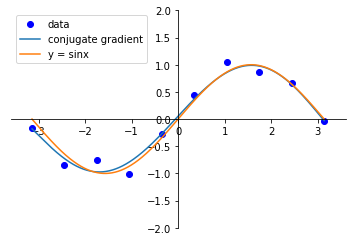

In [13]:
plt.figure()
x4 = np.array(np.linspace(-math.pi,math.pi,1000))
y4 = []

for i in range(1000):
    X4 = np.ones((M4+1,1))
    for j in range(M4+1):
          X4[j][0] = X4[j][0]*(x4[i]**j)
    y4.append(H(W4,X4))
y4 = np.array(y4)

plt.plot(x,y,"ob",label='data')
plt.plot(x4,y4,label='conjugate gradient')
# plt.plot(xL,yT,label='taile')
plt.plot(xs,ys,label='y = sinx')
plt.xlim((-3.6, 3.6))
plt.ylim((-2, 2))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.legend()
plt.show()

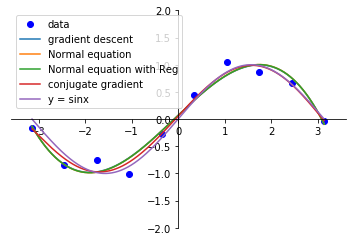

In [14]:
plt.figure()
x1 = np.array(np.linspace(-math.pi,math.pi,1000))
y1 = []
x2 = np.array(np.linspace(-math.pi,math.pi,1000))
y2 = []
x3 = np.array(np.linspace(-math.pi,math.pi,1000))
y3 = []
x4 = np.array(np.linspace(-math.pi,math.pi,1000))
y4 = []


for i in range(1000):
    X1 = np.ones((M1+1,1))
    for j in range(M1+1):
          X1[j][0] = X1[j][0]*(x1[i]**j)
    y1.append(H(W1,X1))
y1 = np.array(y1)

for i in range(1000):
    X2 = np.ones((M2+1,1))
    for j in range(M2+1):
          X2[j][0] = X2[j][0]*(x2[i]**j)
    y2.append(H(W2,X2))
y2 = np.array(y2)

for i in range(1000):
    X3 = np.ones((M3+1,1))
    for j in range(M3+1):
          X3[j][0] = X3[j][0]*(x3[i]**j)
    y3.append(H(W3,X3))
y3 = np.array(y3)

for i in range(1000):
    X4 = np.ones((M4+1,1))
    for j in range(M4+1):
          X4[j][0] = X4[j][0]*(x4[i]**j)
    y4.append(H(W4,X4))
y4 = np.array(y4)

plt.plot(x,y,"ob",label='data')
plt.plot(x1,y1,label='gradient descent')
plt.plot(x2,y2,label='Normal equation')
plt.plot(x3,y3,label='Normal equation with Reg')
plt.plot(x4,y4,label='conjugate gradient')
# plt.plot(xL,yT,label='taile')
plt.plot(xs,ys,label='y = sinx')
plt.xlim((-3.6, 3.6))
plt.ylim((-2, 2))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.legend()
plt.show()